In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [6]:
df = pd.read_csv(url,names=['sepal length','sepal width','petal length','petal_width','target']) 

In [8]:
features =  ['sepal length','sepal width','petal length','petal_width']
targ = ['target']
x = df.loc[:,features].values
y = df.loc[:,targ].values

x = StandardScaler().fit_transform(x)

In [9]:
type(x)

numpy.ndarray

In [10]:
type(y)

numpy.ndarray

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf,df[targ]],axis=1)

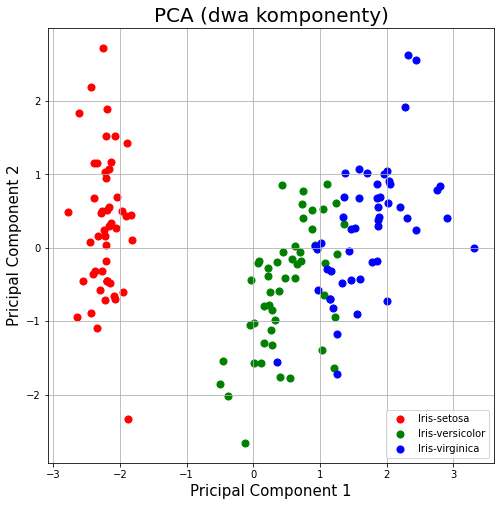

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Pricipal Component 1', fontsize=15)
ax.set_ylabel('Pricipal Component 2', fontsize=15)
ax.set_title('PCA (dwa komponenty)',fontsize=20)

targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']
for target,color in zip(targets,colors):
    itk = finalDf['target'] == target
    ax.scatter(finalDf.loc[itk,'principal component 1'],
               finalDf.loc[itk,'principal component 2'],
               c= color,
               s=50)
ax.legend(targets)
ax.grid()
plt.show()